In [ ]:
#匯入模組
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import math

In [ ]:
#定義符號
t = smp.symbols('t',real=True)
the1, the2 = smp.symbols(r'\theta_1 \theta_2',cls=smp.Function)

#角度
the1 = the1(t)
the2 = the2(t)

#角速度
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)

#角加速度
the1_dd = smp.diff(the1_d,t)
the2_dd = smp.diff(the2_d,t)

In [ ]:
#變數
k = np.radians(72)  #指尖夾角
d = 0.125       #指尖陀螺距離
l = 0.05       #指尖長度
r = 0.02       #指尖寬度
m = 0.0218      #指尖陀螺質量
M = 0.0045       #磁鐵質量
I = 1/12*m*r*r+1/3*m*l*l+3*M*l*l #轉動慣量
q1 = 143       #磁荷1
q2 = 143       #磁荷2
Q = q1*q2/10**7   #磁荷乘積
u = 0.45       #磁偶極矩
u0 = 4*math.pi/10**7 #真空磁導率

the1 = np.radians(20)
the2 = np.radians(30)
#各指尖(磁鐵)位置
x11 = l*smp.cos(the1)
y11 = l*smp.sin(the1)
x12 = l*smp.cos(the1+k)
y12 = l*smp.sin(the1+k)
x13 = l*smp.cos(the1-k)
y13 = l*smp.sin(the1-k)

x21 = d+l*smp.cos(the2)
y21 = l*smp.sin(the2)
x22 = d+l*smp.cos(the2+k)
y22 = l*smp.sin(the2+k)
x23 = d+l*smp.cos(the2-k)
y23 = l*smp.sin(the2-k)

#磁鐵倆倆距離
d11 = ((x11-x21)**2+(y11-y21)**2)**0.5
d12 = ((x11-x22)**2+(y11-y22)**2)**0.5
d13 = ((x11-x23)**2+(y11-y23)**2)**0.5

d21 = ((x12-x21)**2+(y12-y21)**2)**0.5
d22 = ((x12-x22)**2+(y12-y22)**2)**0.5
d23 = ((x12-x23)**2+(y12-y23)**2)**0.5

d31 = ((x13-x21)**2+(y13-y21)**2)**0.5
d32 = ((x13-x22)**2+(y13-y22)**2)**0.5
d33 = ((x13-x23)**2+(y13-y23)**2)**0.5

In [ ]:
#拉格朗日

K = I*(the1_d**2+the2_d**2) #動能

#位能(磁偶極矩 與 磁場 內積)
V11 = u0/4/math.pi*(3*d11*(u*(d11))/d11**5-u/d11**3)*(u)
V12 = u0/4/math.pi*(3*d12*(u*(d12))/d12**5-u/d12**3)*(u)
V13 = u0/4/math.pi*(3*d13*(u*(d13))/d13**5-u/d13**3)*(u)
V21 = u0/4/math.pi*(3*d21*(u*(d21))/d21**5-u/d21**3)*(u)
V22 = u0/4/math.pi*(3*d22*(u*(d22))/d22**5-u/d22**3)*(u)
V23 = u0/4/math.pi*(3*d23*(u*(d23))/d23**5-u/d23**3)*(u)
V31 = u0/4/math.pi*(3*d31*(u*(d31))/d31**5-u/d31**3)*(u)
V32 = u0/4/math.pi*(3*d32*(u*(d32))/d32**5-u/d32**3)*(u)
V33 = u0/4/math.pi*(3*d33*(u*(d33))/d33**5-u/d33**3)*(u)

#舊位能(簡化版、磁荷)
V_old = Q/d11 + Q/d12 + Q/d13 + Q/d21 + Q/d22 + Q/d23 + Q/d31 + Q/d32 + Q/d33
#新位能(複雜版、磁場)
V_new = V11+V12+V13+V21+V22+V23+V31+V32+V33

L = K-V_new #拉格朗日
V_new

0.000231958965460284

In [ ]:
#微分、偏微分
LE2 = smp.diff(L,the2)-smp.diff((smp.diff(L,the2_d)),t)
LE2 = LE2.simplify()

In [ ]:
#解微分方程
sols = smp.solve([LE2],(the2_dd),simplify=False,rational=False)

In [ ]:
#指尖陀螺1的運動方程
dz1dt_f = 0 #回傳角加速度=0
dthe1dt_f = smp.lambdify(the1_d,the1_d) #回傳角速度=角速度

#指尖陀螺2的運動方程
dis = 0.05187 #消耗係數

#回傳角加速度=各種變數待入方程式-消耗項
dz2dt_f = smp.lambdify((the1,the2,the1_d,the2_d), sols[the2_dd]-2*the2_d*dis)
dthe2dt_f = smp.lambdify(the2_d,the2_d) #回傳角速度=角速度

In [ ]:
#定義會回傳[角度1、角度2、角速度1、角速度2]的函式
def dSdt(S,t):
  the1, the2, z1, z2 = S
  return [
      dthe1dt_f(z1),
      dthe2dt_f(z2),
      0,
      dz2dt_f(the1,the2,z1,z2),
  ]

In [ ]:
#跑數值解
time = 10 #總時長
dt = 0.01 #時間間隔
t = np.linspace(0,time,int(time/dt)) #內插建立時間表

#帶入初始條件[角度1、角度2、角速度1、角速度2]、回傳數值解結果
ans = odeint(dSdt,y0=[0,0,5,-3],t=t)

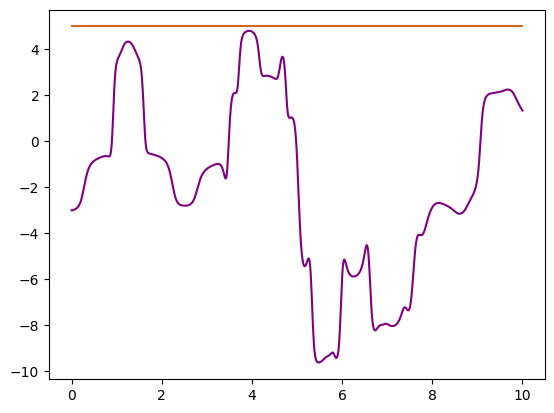

In [ ]:
#匯出數值解結果
r_the1 = ans.T[0]  #角度1數值解結果
r_the2 = ans.T[1]  #角度2數值解結果
r_the1_d = ans.T[2] #角速度1數值解結果
r_the2_d = ans.T[3] #角速度2數值解結果

#畫圖
plt.plot(t,r_the1_d,color='chocolate')  #繪圖(x軸,y軸,顏色="?!")
plt.plot(t,r_the2_d,color='purple')  #繪圖(x軸,y軸,顏色="?!")
plt.show() #秀出圖表

In [ ]:
#將數值解轉出txt檔
path = r"Numerical Solution.txt" #設定檔名
with open (path,'w') as f:
  f.write(str([d,width1/2,l,dt])+"\n") #第一格先寫變數
  for n in range(0,int(time/dt)-1):
    f.write(str([n/dt,r_the1[n],r_the2[n],r_the1_d[n],r_the2_d[n]])+"\n") #後續再逐格寫入數值解[時間、角度1、角度2、角速度1、角速度2]
f.close()